In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
#csvfile

with open('data/Seasons_Stats.csv','rb') as csvfile:
    reader1 = csv.reader(csvfile)
df1 = pd.read_csv('data/Seasons_Stats.csv')

In [3]:
df1.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
df1.tail()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [5]:
df1_no_duplicates = df1.drop_duplicates()

In [6]:
df2 = df1_no_duplicates
df2.dropna(how='all')

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [377]:
del df2['blanl']
del df2['blank2']

 ### why 
 ## df2.drop(columns=['blanl','blank2'])
 ### does not work

In [378]:
df2.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

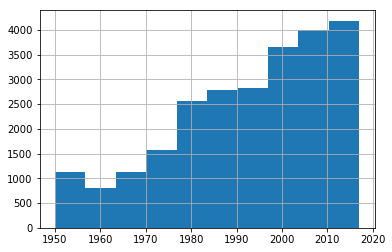

In [379]:
assert df2.Year.dtypes == np.float64
df2['Year'].hist()
#df2.dropna(subset=['Year'])
df2 = df2[np.isfinite(df2['Year'])]
df2 = df2[np.isfinite(df2['Age'])]

In [380]:
df2

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [381]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24616 entries, 0 to 24690
Data columns (total 51 columns):
Unnamed: 0    24616 non-null int64
Year          24616 non-null float64
Player        24616 non-null object
Pos           24616 non-null object
Age           24616 non-null float64
Tm            24616 non-null object
G             24616 non-null float64
GS            18233 non-null float64
MP            24130 non-null float64
PER           24093 non-null float64
TS%           24530 non-null float64
3PAr          18839 non-null float64
FTr           24517 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           24577 non-null float64
DWS           24577 non-null float64
WS            24577 non-null float64
WS/48   

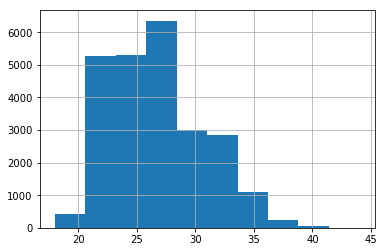

In [382]:
assert df2.Age.dtypes == np.float64
df2['Age'].hist()

In [414]:
assert df2.Pos.dtypes == np.object
#df2['Pos'].hist()

In [418]:
assert df2.Tm.dtypes == np.object
#df2['Tm'].plot()

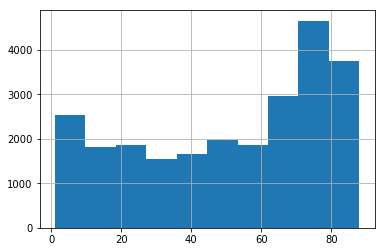

In [385]:
assert df2.G.dtypes == np.float64
df2['G'].hist()

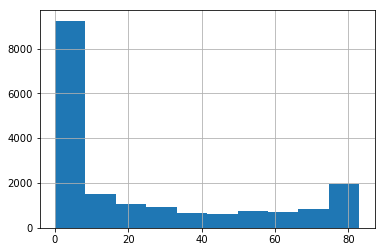

In [386]:
df2["GS"].hist()

In [387]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24616 entries, 0 to 24690
Data columns (total 51 columns):
Unnamed: 0    24616 non-null int64
Year          24616 non-null float64
Player        24616 non-null object
Pos           24616 non-null object
Age           24616 non-null float64
Tm            24616 non-null object
G             24616 non-null float64
GS            18233 non-null float64
MP            24130 non-null float64
PER           24093 non-null float64
TS%           24530 non-null float64
3PAr          18839 non-null float64
FTr           24517 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           24577 non-null float64
DWS           24577 non-null float64
WS            24577 non-null float64
WS/48   

In [388]:
df2.isnull().sum()

Unnamed: 0       0
Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS            6383
MP             486
PER            523
TS%             86
3PAr          5777
FTr             99
ORB%          3824
DRB%          3824
TRB%          3045
AST%          2061
STL%          3824
BLK%          3824
TOV%          5034
USG%          4976
OWS             39
DWS             39
WS              39
WS/48          523
OBPM          3819
DBPM          3819
BPM           3819
VORP          3819
FG               0
FGA              0
FG%             99
3P            5689
3PA           5689
3P%           9200
2P               0
2PA              0
2P%            128
eFG%            99
FT               0
FTA              0
FT%            858
ORB           3819
DRB           3819
TRB            312
AST              0
STL           3819
BLK           3819
TOV           4971
PF               0
PTS              0
dtype: int64

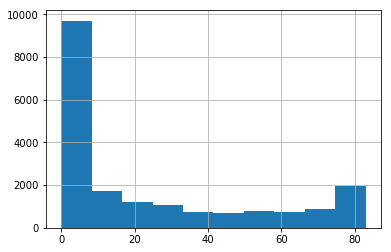

In [403]:
df2["GS"] = df2.groupby("Player").GS.transform(lambda x: x.fillna(x.mode()))
df2["MP"] = df2.groupby("Player").MP.transform(lambda x: x.fillna(x.mode()))
df2["PER"] = df2.groupby("Player").PER.transform(lambda x: x.fillna(x.mode()))
df2["FTr"] = df2.groupby("Player").FTr.transform(lambda x: x.fillna(x.mode()))
df2["OWS"] = df2.groupby("Player").OWS.transform(lambda x: x.fillna(x.mode()))
df2["DWS"] = df2.groupby("Player").DWS.transform(lambda x: x.fillna(x.mode()))
df2["WS"] = df2.groupby("Player").WS.transform(lambda x: x.fillna(x.mode()))
df2["OBPM"] = df2.groupby("Player").OBPM.transform(lambda x: x.fillna(x.mode()))
df2["DBPM"] = df2.groupby("Player").DBPM.transform(lambda x: x.fillna(x.mode()))
df2["BPM"] = df2.groupby("Player").BPM.transform(lambda x: x.fillna(x.mode()))
df2["GS"].hist()

In [407]:
df2["VORP"] = df2.groupby("Player").VORP.transform(lambda x: x.fillna(x.mode()))
df2["ORB"] = df2.groupby("Player").ORB.transform(lambda x: x.fillna(x.mode()))
df2["DRB"] = df2.groupby("Player").DRB.transform(lambda x: x.fillna(x.mode()))
df2["TRB"] = df2.groupby("Player").TRB.transform(lambda x: x.fillna(x.mode()))

In [409]:
df2["TOV"] = df2.groupby("Player").TOV.transform(lambda x: x.fillna(x.mode()))

In [410]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24616 entries, 0 to 24690
Data columns (total 51 columns):
Unnamed: 0    24616 non-null int64
Year          24616 non-null float64
Player        24616 non-null object
Pos           24616 non-null object
Age           24616 non-null float64
Tm            24616 non-null object
G             24616 non-null float64
GS            19502 non-null float64
MP            24343 non-null float64
PER           24337 non-null float64
TS%           24530 non-null float64
3PAr          18839 non-null float64
FTr           24517 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           24614 non-null float64
DWS           24614 non-null float64
WS            24614 non-null float64
WS/48   

In [ ]:
df2['MP'].hist()

In [ ]:
assert df2.PER.dtypes == np.float64
df2['PER'].hist()

In [ ]:
df2['TS%'].hist()
df2["TS%"] = df2.groupby("Player")["TS%"].transform(lambda x: x.fillna(x.mode()))

In [ ]:
df2['3PAr'].hist()

In [ ]:
df2['FTr'].hist()

In [ ]:
df2['ORB%'].hist()

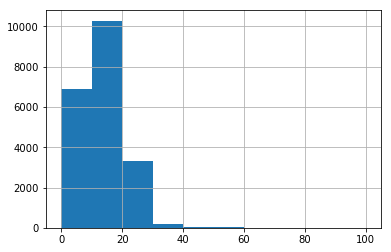

In [428]:
df2['DRB%'].hist()
df2["DRB%"] = df2.groupby("Player")["DRB%"].transform(lambda x: x.fillna(x.mode()))

In [429]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24616 entries, 0 to 24690
Data columns (total 51 columns):
Unnamed: 0    24616 non-null int64
Year          24616 non-null float64
Player        24616 non-null object
Pos           24616 non-null object
Age           24616 non-null float64
Tm            24616 non-null object
G             24616 non-null float64
GS            19502 non-null float64
MP            24343 non-null float64
PER           24337 non-null float64
TS%           24530 non-null float64
3PAr          18839 non-null float64
FTr           24517 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           24614 non-null float64
DWS           24614 non-null float64
WS            24614 non-null float64
WS/48   

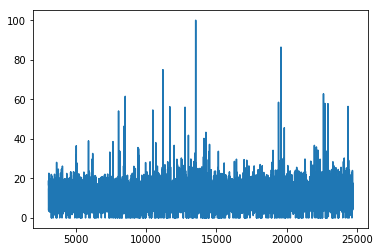

In [438]:
df2['TRB%'].plot()
df2["TRB%"] = df2.groupby("Player")["TRB%"].transform(lambda x: x.fillna(x.mode()))

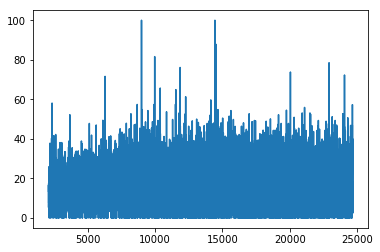

In [437]:
df2['AST%'].plot()
df2["AST%"] = df2.groupby("Player")["AST%"].transform(lambda x: x.fillna(x.mode()))

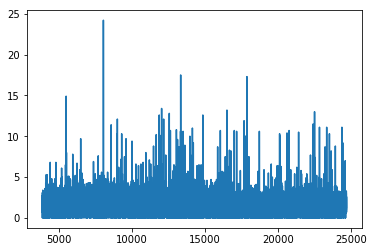

In [436]:
df2['STL%'].plot()
df2["STL%"] = df2.groupby("Player")["STL%"].transform(lambda x: x.fillna(x.mode()))

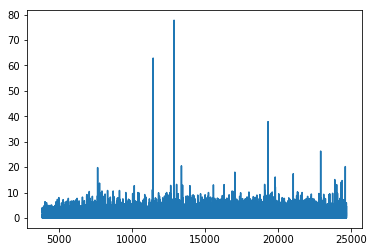

In [435]:
df2['BLK%'].plot()
df2["BLK%"] = df2.groupby("Player")["BLK%"].transform(lambda x: x.fillna(x.mode()))

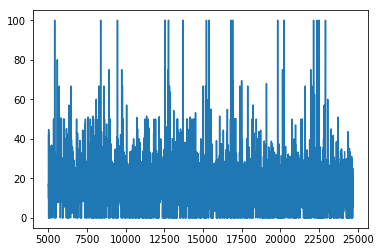

In [430]:
df2['TOV%'].plot()
df2["TOV%"] = df2.groupby("Player")["TOV%"].transform(lambda x: x.fillna(x.mode()))

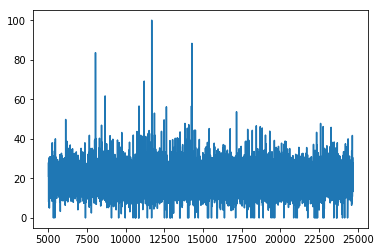

In [440]:
df2['USG%'].plot()
df2["USG%"] = df2.groupby("Player")["USG%"].transform(lambda x: x.fillna(x.mode()))

In [ ]:
df2['OWS'].plot()

In [ ]:
df2['DWS'].plot()

In [ ]:
df2['WS'].plot()

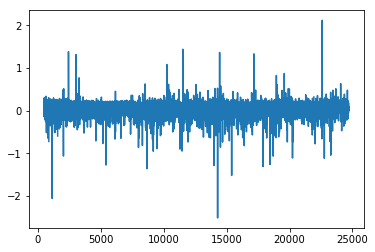

In [442]:
df2['WS/48'].plot()
df2["WS/48"] = df2.groupby("Player")["WS/48"].transform(lambda x: x.fillna(x.mode()))

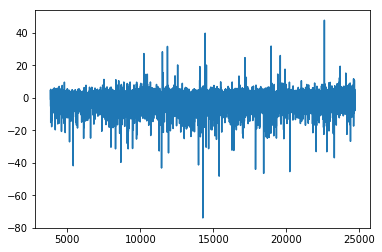

In [443]:
df2['OBPM'].plot()

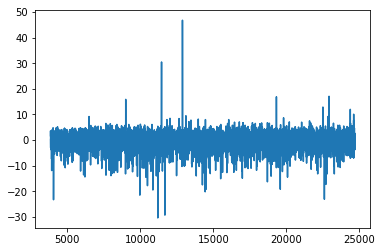

In [444]:
df2['DBPM'].plot()

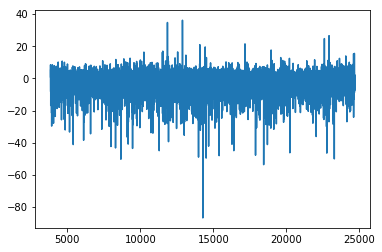

In [445]:
df2['BPM'].plot()

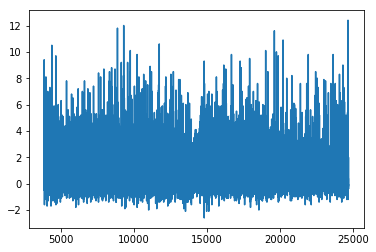

In [446]:
df2['VORP'].plot()

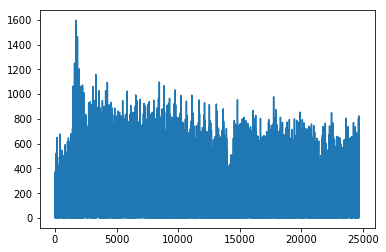

In [447]:
df2['FG'].plot()

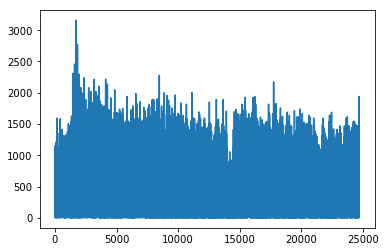

In [448]:
df2['FGA'].plot()

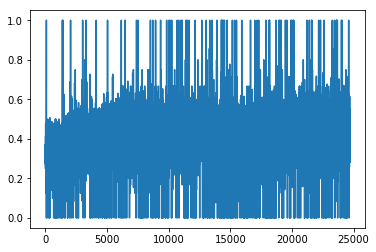

In [449]:
df2['FG%'].plot()
df2["WS/48"] = df2.groupby("Player")["WS/48"].transform(lambda x: x.fillna(x.mode()))

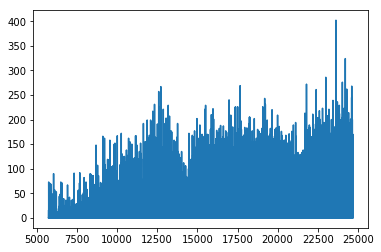

In [451]:
df2['3P'].plot()
df2["3P"] = df2.groupby("Player")["3P"].transform(lambda x: x.fillna(x.mode()))

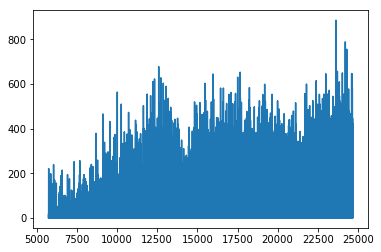

In [452]:
df2['3PA'].plot()
df2["3PA"] = df2.groupby("Player")["3PA"].transform(lambda x: x.fillna(x.mode()))

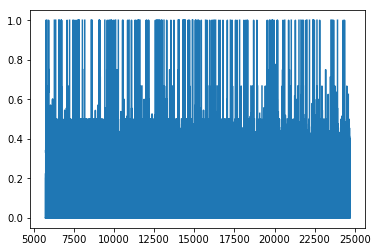

In [453]:
df2['3P%'].plot()
df2["3P%"] = df2.groupby("Player")["3P%"].transform(lambda x: x.fillna(x.mode()))

In [454]:
df2["3P%"].describe()

count    15416.000000
mean         0.248796
std          0.176683
min          0.000000
25%          0.100000
50%          0.292000
75%          0.363000
max          1.000000
Name: 3P%, dtype: float64

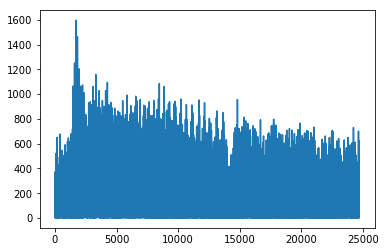

In [455]:
df2['2P'].plot()
df2["2P"] = df2.groupby("Player")["2P"].transform(lambda x: x.fillna(x.mode()))

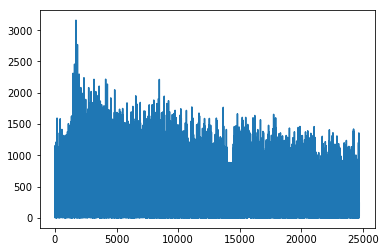

In [456]:
df2['2PA'].plot()
df2["2PA"] = df2.groupby("Player")["2PA"].transform(lambda x: x.fillna(x.mode()))

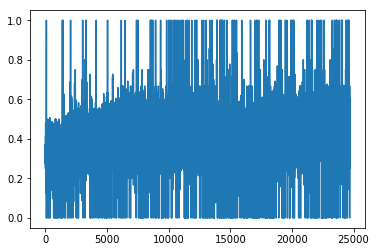

In [457]:
df2['2P%'].plot()
df2["2P%"] = df2.groupby("Player")["2P%"].transform(lambda x: x.fillna(x.mode()))

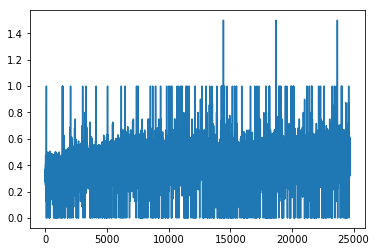

In [458]:
df2['eFG%'].plot()
df2["eFG%"] = df2.groupby("Player")["eFG%"].transform(lambda x: x.fillna(x.mode()))

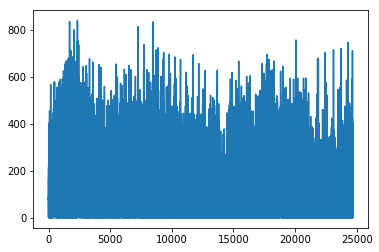

In [461]:
df2['FT'].plot()

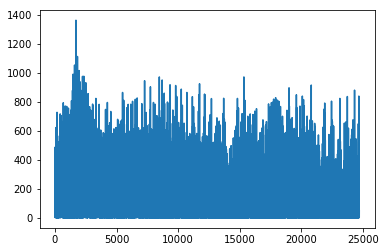

In [462]:
df2['FTA'].plot()

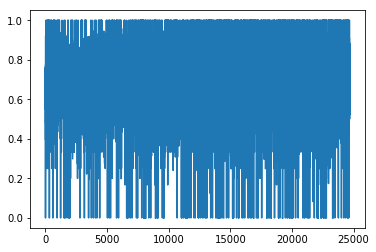

In [459]:
df2['FT%'].plot()
df2["FT%"] = df2.groupby("Player")["FT%"].transform(lambda x: x.fillna(x.mode()))

In [460]:
df2["FT"].describe()

count    24616.000000
mean       102.415827
std        113.381738
min          0.000000
25%         18.000000
50%         63.000000
75%        149.000000
max        840.000000
Name: FT, dtype: float64

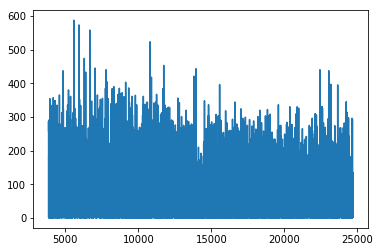

In [463]:
df2['ORB'].plot()

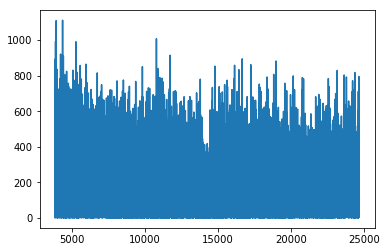

In [464]:
df2['DRB'].plot()

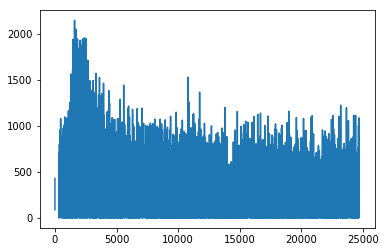

In [465]:
df2['TRB'].plot()

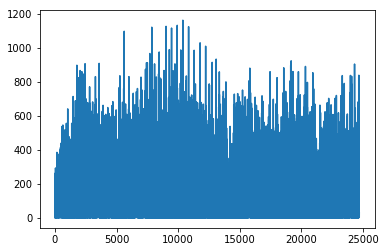

In [466]:
df2['AST'].plot()

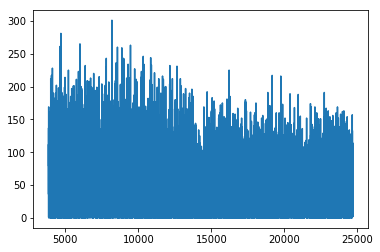

In [467]:
df2['STL'].plot()

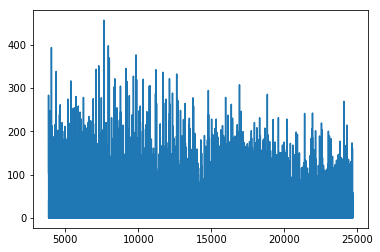

In [468]:
df2['BLK'].plot()

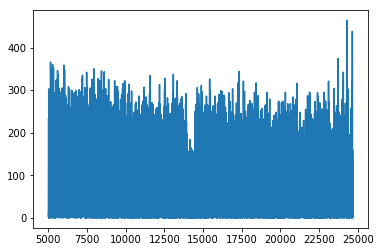

In [469]:
df2['TOV'].plot()

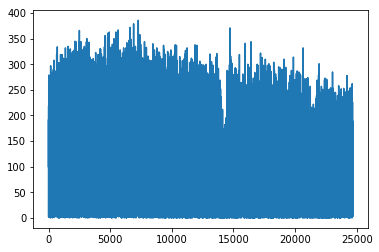

In [470]:
df2['PF'].plot()

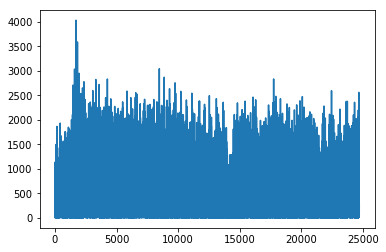

In [471]:
df2['PTS'].plot()

In [472]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24616 entries, 0 to 24690
Data columns (total 51 columns):
Unnamed: 0    24616 non-null int64
Year          24616 non-null float64
Player        24616 non-null object
Pos           24616 non-null object
Age           24616 non-null float64
Tm            24616 non-null object
G             24616 non-null float64
GS            19502 non-null float64
MP            24343 non-null float64
PER           24337 non-null float64
TS%           24530 non-null float64
3PAr          18839 non-null float64
FTr           24517 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           24614 non-null float64
DWS           24614 non-null float64
WS            24614 non-null float64
WS/48   

In [474]:
#assert pd.notnull(df2).all().all()

In [ ]:
#df_no_missing = df2.dropna()
#df_no_missing